# COHORT ANALYSIS

## INTRODUCTION

Cohort Analysis is a method used in analytics and business intelligence to group customers or users into cohorts based on shared characteristics or experiences within a defined time-span. These cohorts are then tracked over time to observe changes in behavior, usage, or other key metrics.
Cohort analysis is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. Below is the process we can follow for the task of Cohort Analysis:


1. The first step is to define the cohorts based on a specific characteristic
or event. For example, in an e-commerce platform, cohorts could be defined based on the month of a user’s first purchase.
2. Gather relevant data for analysis.
3. Determine the time intervals you want to analyze.
4. Group users into cohorts based on the defined characteristic or event.
5. Choose the key performance metrics you want to analyze.
6. Calculate the chosen metrics for each cohort over the specified time periods.
7. Create visualizations to present your findings effectively.


In [14]:
import pandas as pd

# ABOUT THE DATASET

In [15]:
data = pd.read_csv("cohorts.csv")
print(data.head())

         Date  New users  Returning users  Duration Day 1  Duration Day 7
0  25/10/2023       3461             1437      202.156977      162.523809
1  26/10/2023       3777             1554      228.631944      258.147059
2  27/10/2023       3100             1288      227.185841      233.550000
3  28/10/2023       2293              978      261.079545      167.357143
4  29/10/2023       2678             1082      182.567568      304.350000


The provided dataset contains user interaction data, including metrics such as the number of new and returning users, and their engagement durations on Day 1 and Day 7. The data is structured with dates, allowing for time-series analysis. Key columns in the dataset are:

1. Date: The specific dates of user interactions.
2. New Users: The count of new users for each date.
3. Returning Users: The count of users returning on each date.
4. Duration Day 1: The average duration (possibly in minutes or seconds) of user interaction on their first day.
5. Duration Day 7: The average duration of user interaction on their seventh day.


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


## DATA TYPES
Checking for datatypes of all the columns in the data

In [17]:
data.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format:

In [18]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\faizu\AppData\Local\Temp\ipykernel_27620\128654025.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   New users        30 non-null     int64         
 2   Returning users  30 non-null     int64         
 3   Duration Day 1   30 non-null     float64       
 4   Duration Day 7   30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.3 KB


## MISSING VALUES


Checking whether the dataset has any null values or not

In [20]:
missing_values = data.isnull().sum()
print(missing_values)

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64


## STATISTICAL SUMMARY

In [24]:
# Display the descriptive statistics of the dataset
data.describe()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
count,30,30.000000,30.000000,30.000000,30.000000
mean,2023-11-08 12:00:00,3418.166667,1352.866667,208.259594,136.037157
min,2023-10-25 00:00:00,1929.000000,784.000000,59.047619,0.000000
25%,2023-11-01 06:00:00,3069.000000,1131.500000,182.974287,68.488971
50%,2023-11-08 12:00:00,3514.500000,1388.000000,206.356554,146.381667
75%,2023-11-15 18:00:00,3829.500000,1543.750000,230.671046,220.021875
max,2023-11-23 00:00:00,4790.000000,1766.000000,445.872340,304.350000
std,NaN,677.407486,246.793189,64.730830,96.624319


The descriptive statistics provide the following insights:

  New Users: The average number of new users is around 3,418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1,929 and 4,790, respectively.

  Returning Users: On average, there are about 1,353 returning users, with a standard deviation of around 247. The minimum and maximum are 784 and 1,766, respectively.
    
  Duration Day 1: The average duration on the first day is about 208 seconds with a considerable spread (standard deviation is around 65).
  
  Duration Day 7: The average 7-day duration is lower, around 136 seconds, with a larger standard deviation of about 97. The range is from 0 to 304.


To perfrom cohort analysis, we need to create a cohort ie week in this case for further analysis.

In [27]:
# Grouping data by week
data['Week'] = (data['Date'].dt.isocalendar().week).astype(int)

# DATA DISTRIBUTIONS AND TREND ANALYSIS

Plotting distributions of all variables

C:\Users\faizu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

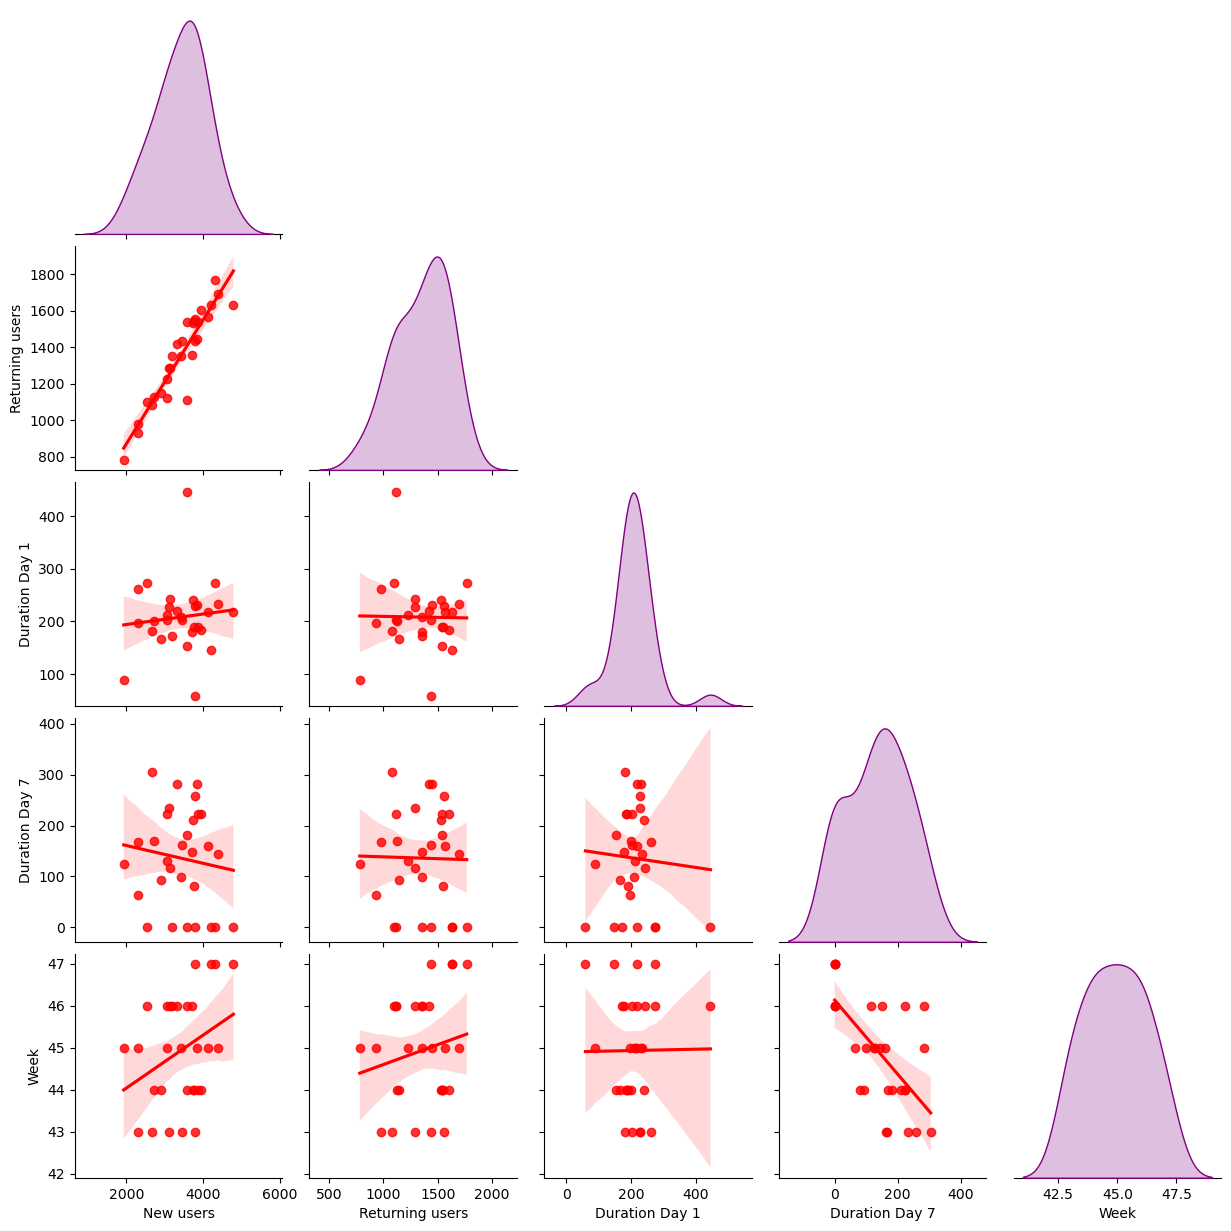

In [59]:
plt.figure(figsize=(7,7)) 
sns.pairplot(data,#height=1.1,aspect=1,
              corner=True,
              kind='reg',diag_kind='kde',
              plot_kws=dict(marker="o",color='red'),
              diag_kws=dict(fill=True, color='purple'))

The Trend Analysis for the new and returning users over time:

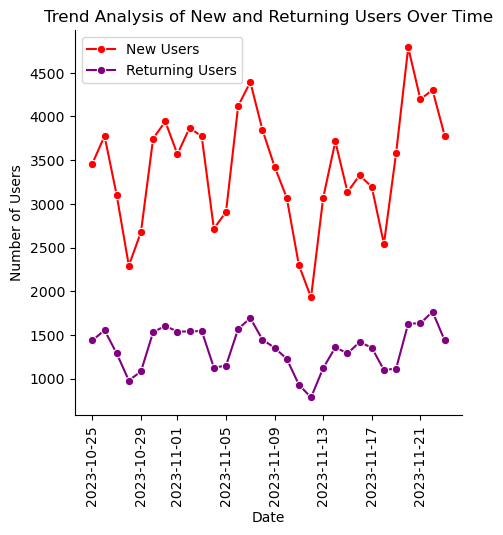

In [63]:
plt.figure(figsize=(5, 5))
sns.lineplot(data=data,x='Date',y='New users',color='red',marker='o',label='New Users')
sns.lineplot(data=data, x='Date',y='Returning users',color='purple',marker='o',label='Returning Users')
sns.despine()
plt.title('Trend Analysis of New and Returning Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

The Trend Analysis for the Duration (Day 1 and Day 7) Over Time:

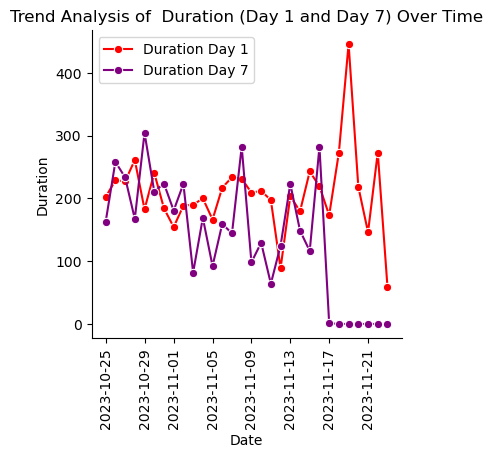

In [68]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=data,x='Date',y='Duration Day 1' ,color='red',marker='o',label='Duration Day 1')
sns.lineplot(data=data, x='Date',y='Duration Day 7',color='purple',marker='o',label='Duration Day 7')
sns.despine()
plt.title('Trend Analysis of  Duration (Day 1 and Day 7) Over Time')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.xticks(rotation=90)
plt.show()

 The Correlation between the variables:

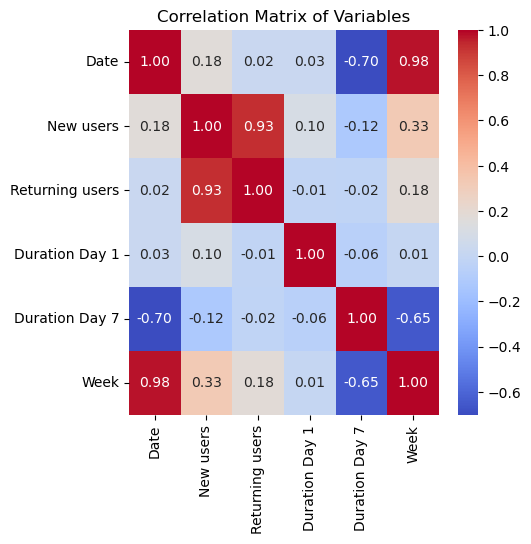

In [61]:
# Plotting the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

Here, the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

# PERFORM COHORT ANALYSIS

For each cohort (week), calculating the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7 by grouping the data by week and calculating the necessary averages:

In [36]:
# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

weekly_averages.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


Plotting the trend of the weekly average of the new and returning users and the duration:

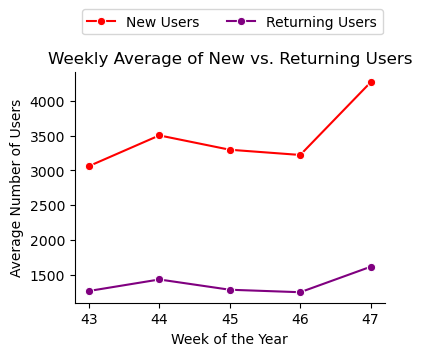

In [65]:
plt.figure(figsize=(4,3))
sns.lineplot(data=weekly_averages, x='Week', y='New users', color='red', marker='o', label='New Users')
sns.lineplot(data=weekly_averages, x='Week', y='Returning users', color='purple', marker='o', label='Returning Users')
sns.despine()
plt.title('Weekly Average of New vs. Returning Users')
plt.xlabel('Week of the Year')
plt.ylabel('Average Number of Users')

plt.legend(bbox_to_anchor=(0,1.3), loc='upper left',ncols=2)
plt.show()

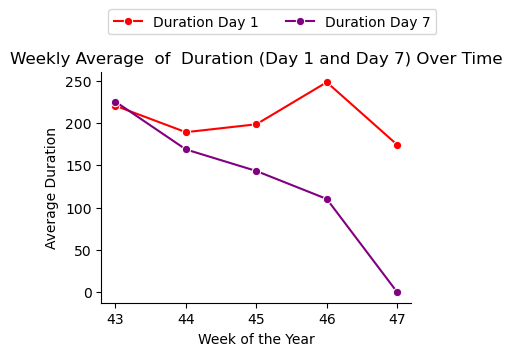

In [66]:
plt.figure(figsize=(4,3))
sns.lineplot(data=weekly_averages, x='Week', y='Duration Day 1' ,color='red',marker='o',label='Duration Day 1')
sns.lineplot(data=weekly_averages, x='Week', y='Duration Day 7',color='purple',marker='o',label='Duration Day 7')
sns.despine()
plt.title('Weekly Average  of  Duration (Day 1 and Day 7) Over Time')
plt.xlabel('Week of the Year')
plt.ylabel('Average Duration')

plt.legend(bbox_to_anchor=(0,1.3), loc='upper left',ncols=2)

plt.show()

### COHORT MATRIX

In the cohort matrix, each row will correspond to a week of the year, and each column will represent a different metric:

  

1.   Average number of new users.  
2.   Average number of returning users.
3.   Average duration on Day 1.
4.   Average duration on Day 7.












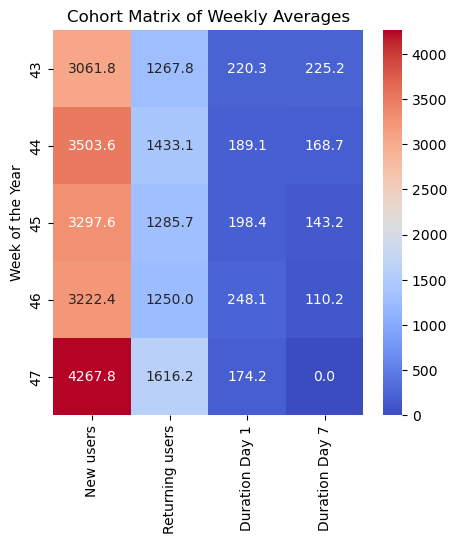

In [67]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(5, 5))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

Insights:

We can see that the number of new users and returning users fluctuates from week to week.
Notably, there was a significant increase in both new and returning users in Week 47. 
The average duration of user engagement on Day 1 and Day 7 varies across the weeks. 
The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.

# SUMMARY

Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way.